In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Edulyt India - Data for Project - 4_Up.xlsx', sheet_name='New_Account')
df2= pd.read_excel('/content/drive/MyDrive/Edulyt India - Data for Project - 4_Up.xlsx', sheet_name='New_Card')
df3= pd.read_excel('/content/drive/MyDrive/Edulyt India - Data for Project - 4_Up.xlsx', sheet_name='District')
df4= pd.read_excel('/content/drive/MyDrive/Edulyt India - Data for Project - 4_Up.xlsx', sheet_name='Loan')
df5= pd.read_excel('/content/drive/MyDrive/Edulyt India - Data for Project - 4_Up.xlsx', sheet_name='New_Client')
df6= pd.read_excel('/content/drive/MyDrive/Edulyt India - Data for Project - 4_Up.xlsx', sheet_name='New_Disposition')
df7= pd.read_excel('/content/drive/MyDrive/Edulyt India - Data for Project - 4_Up.xlsx', sheet_name='New_Transaction')
df8= pd.read_excel('/content/drive/MyDrive/Edulyt India - Data for Project - 4_Up.xlsx', sheet_name='Order')

In [ ]:
df3.rename(columns={'A1': 'district_id'}, inplace=True)

df7['date'] = pd.to_datetime(df7['date'], format='%y%m%d')
df7['mm_yy'] = df7['date'].dt.strftime('%m/%y')
df7['month'] = df7['date'].dt.to_period('M').astype(str)

In [ ]:
df3_new = df3.copy()
df3_new['region'] = df3_new['A3'].str.split().str[1]
print(df3_new.head())
df3 = df3.merge(df3_new[['region']], left_index=True, right_index=True)

   district_id           A2               A3       A4  A5  A6  A7  A8  A9  \
0            1  Hl.m. Praha           Prague  1204953   0   0   0   1   1   
1            2      Benesov  central Bohemia    88884  80  26   6   2   5   
2            3       Beroun  central Bohemia    75232  55  26   4   1   5   
3            4       Kladno  central Bohemia   149893  63  29   6   2   6   
4            5        Kolin  central Bohemia    95616  65  30   4   1   6   

     A10    A11   A12   A13  A14    A15    A16   region  
0  100.0  12541  0.29  0.43  167  85677  99107      NaN  
1   46.7   8507  1.67  1.85  132   2159   2674  Bohemia  
2   41.7   8980  1.95  2.21  111   2824   2813  Bohemia  
3   67.4   9753  4.64  5.05  109   5244   5892  Bohemia  
4   51.4   9307  3.85  4.43  118   2616   3040  Bohemia  


In [ ]:
df3['region'] = df3['region'].fillna('Prague')
df3.head()

,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,region
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,Prague
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674,Bohemia
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813,Bohemia
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892,Bohemia
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040,Bohemia


In [ ]:
AccDistrict_Merged= pd.merge(df1,df3,on='district_id',how='inner')

In [ ]:
AccDistrict_Merged.head()

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,region
0,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,3659,3894,Moravia
1,3818,74,MONTHLY ISSUANCE,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347,Moravia
2,704,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,9,33.9,8743,1.88,2.43,111,3659,3894,Moravia
3,2378,16,MONTHLY ISSUANCE,Jindrichuv Hradec,south Bohemia,93931,74,21,10,1,8,56.9,8427,1.12,1.54,107,1874,1913,Bohemia
4,2632,24,MONTHLY ISSUANCE,Karlovy Vary,west Bohemia,122603,25,21,6,2,8,80.0,8991,1.39,2.01,128,5198,5273,Bohemia


In [ ]:
AccDistrictTrans_Merged= pd.merge(AccDistrict_Merged,df7,on='account_id',how='inner')

In [ ]:
AccDistrictTrans_Merged.head()

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,...,region,trans_id,date,type,operation,amount,balance,k_symbol,mm_yy,month
0,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,2,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,01/93,1993-01
1,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,50,1993-01-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,7107.0,OLD AGE PENSION,01/93,1993-01
2,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,154,1993-01-31,CREDIT,NaN,20.1,7127.1,INTEREST CREDITED,01/93,1993-01
3,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,309,1993-02-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,13334.1,OLD AGE PENSION,02/93,1993-02
4,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,509,1993-02-28,CREDIT,NaN,29.6,13363.7,INTEREST CREDITED,02/93,1993-02


In [ ]:
filtered_df = AccDistrictTrans_Merged[
    (AccDistrictTrans_Merged['type'].str.lower() == 'credit') &
    (AccDistrictTrans_Merged['region'].str.contains('Moravia|Prague', case=False))
]

In [ ]:
filtered_df.head()

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,...,region,trans_id,date,type,operation,amount,balance,k_symbol,mm_yy,month
0,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,2,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,01/93,1993-01
1,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,50,1993-01-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,7107.0,OLD AGE PENSION,01/93,1993-01
2,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,154,1993-01-31,CREDIT,NaN,20.1,7127.1,INTEREST CREDITED,01/93,1993-01
3,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,309,1993-02-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,13334.1,OLD AGE PENSION,02/93,1993-02
4,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,509,1993-02-28,CREDIT,NaN,29.6,13363.7,INTEREST CREDITED,02/93,1993-02


In [ ]:
print(filtered_df.shape)

(192230, 28)


In [ ]:
filtered_df.to_csv("credit_data.csv", index=False)

In [ ]:
!pip install streamlit pyngrok --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.4 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd

filtered_df = pd.read_csv("credit_data.csv")

st.title("📊 Credit Transactions Dashboard")

# Step 1: Account Summary
st.header("1️⃣ Account Summary")
account_list = sorted(filtered_df['account_id'].unique())
selected_account = st.selectbox("Select an account", account_list)

if selected_account:
    acc_data = filtered_df[filtered_df['account_id'] == selected_account]
    total_amount = acc_data['amount'].sum()
    regions = ", ".join(acc_data['region'].unique())
    st.write(f"**Total Amount Spent**: ₹{total_amount:,.2f}")
    st.write(f"**Regions**: {regions}")

# Step 2: Month-wise Unique Customers
st.header("2️⃣ Month-wise Unique Customer Count")
monthwise = filtered_df.groupby('month')['account_id'].nunique().reset_index()
monthwise.columns = ['month', 'unique_customers']
st.bar_chart(data=monthwise.set_index('month'))

# Step 3: Account + Month Lookup
st.header("3️⃣ Account + Month Spend Lookup")
col1, col2 = st.columns(2)
with col1:
    selected_account_2 = st.selectbox("Choose account", account_list, key="account2")
with col2:
    month_list = sorted(filtered_df['month'].unique())
    selected_month = st.selectbox("Choose month", month_list)

combo = filtered_df[
    (filtered_df['account_id'] == selected_account_2) &
    (filtered_df['month'] == selected_month)
]
if not combo.empty:
    amount = combo['amount'].sum()
    st.success(f"Amount spent by Account **{selected_account_2}** in **{selected_month}**: ₹{amount:,.2f}")
else:
    st.warning("No transaction found for this account-month combination.")

Writing app.py


In [ ]:
from pyngrok import ngrok

# Replace YOUR_TOKEN_HERE with your actual token
!ngrok config add-authtoken 2ypJjFChn872OR3ZYTcTl5qYyUY_64cv1ssJvJ9Gak5UE4SE2

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Kill any previous tunnel
!pkill streamlit

# Start Streamlit in background
!streamlit run app.py &> /dev/null &

# Start ngrok with correct configuration for http
public_url = ngrok.connect(addr="8501", proto="http")
print(f"🔗 Streamlit is live here:\n{public_url}")

🔗 Streamlit is live here:
NgrokTunnel: "https://6301-34-125-18-189.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pkill streamlit
!pkill ngrok

In [ ]:
from datetime import datetime, timedelta

filtered_df2 = AccDistrictTrans_Merged.copy()
filtered_df2['date'] = pd.to_datetime(filtered_df2['date'], errors='coerce')

# Filter last 3 months from the latest date in data
latest_date = filtered_df2['date'].max()
three_months_ago = latest_date - pd.DateOffset(months=3)

filtered_df2_recent = filtered_df2[filtered_df2['date'] >= three_months_ago]

In [ ]:
AccDistrictTrans_Merged.shape

(1048575, 28)

In [ ]:
filtered_df2.head()

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,...,region,trans_id,date,type,operation,amount,balance,k_symbol,mm_yy,month
0,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,2,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,01/93,1993-01
1,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,50,1993-01-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,7107.0,OLD AGE PENSION,01/93,1993-01
2,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,154,1993-01-31,CREDIT,NaN,20.1,7127.1,INTEREST CREDITED,01/93,1993-01
3,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,309,1993-02-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,13334.1,OLD AGE PENSION,02/93,1993-02
4,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,509,1993-02-28,CREDIT,NaN,29.6,13363.7,INTEREST CREDITED,02/93,1993-02


In [ ]:
# Group by district and get population (assuming constant per district)
district_pop = filtered_df2[['region', 'A3']].drop_duplicates()

top_5 = district_pop.sort_values(by='A3', ascending=False).head(5)['region']
bottom_5 = district_pop.sort_values(by='A3', ascending=True).head(5)['region']

In [ ]:
print(top_5)
print(bottom_5)

1824    Bohemia
0       Moravia
1392    Bohemia
356     Moravia
8217    Bohemia
Name: region, dtype: object
2754     Prague
6485    Bohemia
3203    Bohemia
8217    Bohemia
356     Moravia
Name: region, dtype: object


In [ ]:
target_districts = pd.concat([top_5, bottom_5])
df_target = filtered_df2_recent[filtered_df2_recent['region'].isin(target_districts)]

In [ ]:
df_target.head(10)

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,...,region,trans_id,date,type,operation,amount,balance,k_symbol,mm_yy,month
342,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,977020,1998-09-30,CREDIT,NaN,124.3,31736.0,INTEREST CREDITED,09/98,1998-09
343,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,977640,1998-09-30,DEBIT,CASH WITHDRAWAL,14.6,31721.4,PAYMENT ON STATEMENT,09/98,1998-09
344,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,989959,1998-10-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,37928.4,OLD AGE PENSION,10/98,1998-10
345,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,992706,1998-10-13,DEBIT,REMITTANCE TO ANOTHER BANK,3662.0,34266.4,HOUSEHOLD,10/98,1998-10
346,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,1002661,1998-10-31,CREDIT,NaN,135.3,34401.8,INTEREST CREDITED,10/98,1998-10
347,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,1003349,1998-10-31,DEBIT,CASH WITHDRAWAL,14.6,34387.2,PAYMENT ON STATEMENT,10/98,1998-10
348,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,1007549,1998-11-01,DEBIT,CASH WITHDRAWAL,2500.0,31887.2,NaN,11/98,1998-11
349,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,1015626,1998-11-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,38094.2,OLD AGE PENSION,11/98,1998-11
350,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,1018363,1998-11-13,DEBIT,REMITTANCE TO ANOTHER BANK,3662.0,34432.2,HOUSEHOLD,11/98,1998-11
351,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,1028017,1998-11-30,CREDIT,NaN,141.0,34573.1,INTEREST CREDITED,11/98,1998-11


In [ ]:
summary = (
    df_target.groupby(['A3', 'type'])['amount']
    .sum()
    .reset_index()
    .pivot(index='A3', columns='type', values='amount')
    .fillna(0)
    .reset_index()
)

In [ ]:
summary['region'] = summary['A3'].map(
    filtered_df2.set_index('region')['A3'].to_dict()
)

summary['population_group'] = summary['region'].apply(
    lambda x: 'High Population' if x in top_5.values else 'Low Population'
)

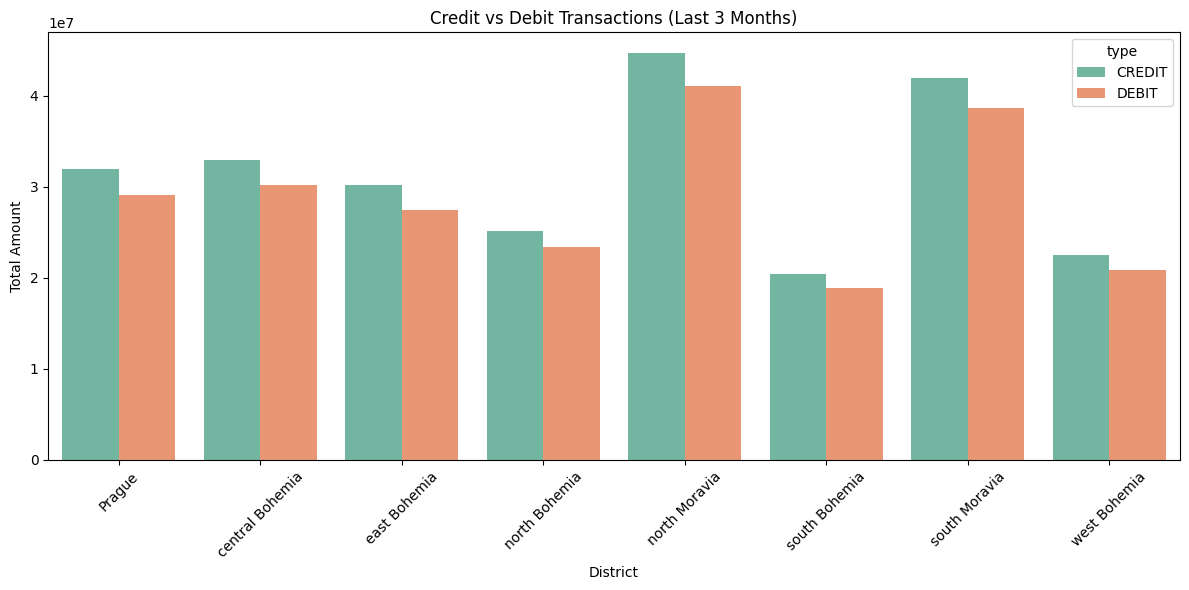

In [ ]:
# Convert to long format for grouped bar plot
plot_data = summary.melt(id_vars=['A3', 'population_group'], value_vars=['CREDIT', 'DEBIT'],
                         var_name='type', value_name='amount')

plt.figure(figsize=(12,6))
sns.barplot(data=plot_data, x='A3', y='amount', hue='type', palette='Set2')

plt.title("Credit vs Debit Transactions (Last 3 Months)")
plt.xlabel("District")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
Card_Disposition_Merged= pd.merge(df2,df6,on='disp_id',how='inner')

In [ ]:
Card_Disposition_Merged.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y
0,1005,9285,CLASSIC,931107,9593,7753,OWNER
1,104,588,CLASSIC,940119,588,489,OWNER
2,747,4915,CLASSIC,940205,4915,4078,OWNER
3,70,439,CLASSIC,940208,439,361,OWNER
4,577,3687,CLASSIC,940215,3687,3050,OWNER


In [ ]:
Card_Disposition_Client_Merged= pd.merge(Card_Disposition_Merged,df5,on='client_id',how='inner')

In [ ]:
Card_Disposition_Client_Merged.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y,Unnamed: 0,birth_number,district_id,gender,age,age_levels
0,1005,9285,CLASSIC,931107,9593,7753,OWNER,5024,680128,74,FEMALE,31,ADULT
1,104,588,CLASSIC,940119,588,489,OWNER,562,601020,61,FEMALE,39,MIDDLE AGED
2,747,4915,CLASSIC,940205,4915,4078,OWNER,4584,630719,40,MALE,36,MIDDLE AGED
3,70,439,CLASSIC,940208,439,361,OWNER,419,680912,51,FEMALE,31,ADULT
4,577,3687,CLASSIC,940215,3687,3050,OWNER,3494,720206,49,MALE,27,ADULT


In [ ]:
Card_Disposition_Client_Merged.shape

(892, 13)

In [ ]:
Card_Disposition_Client_Merged['AgeGroup_Gender'] = Card_Disposition_Client_Merged['age_levels'] + ' ' + Card_Disposition_Client_Merged['gender']

In [ ]:
Card_Disposition_Client_Merged.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y,Unnamed: 0,birth_number,district_id,gender,age,age_levels,AgeGroup_Gender
0,1005,9285,CLASSIC,931107,9593,7753,OWNER,5024,680128,74,FEMALE,31,ADULT,ADULT FEMALE
1,104,588,CLASSIC,940119,588,489,OWNER,562,601020,61,FEMALE,39,MIDDLE AGED,MIDDLE AGED FEMALE
2,747,4915,CLASSIC,940205,4915,4078,OWNER,4584,630719,40,MALE,36,MIDDLE AGED,MIDDLE AGED MALE
3,70,439,CLASSIC,940208,439,361,OWNER,419,680912,51,FEMALE,31,ADULT,ADULT FEMALE
4,577,3687,CLASSIC,940215,3687,3050,OWNER,3494,720206,49,MALE,27,ADULT,ADULT MALE


In [ ]:
Card_Disposition_Client_Merged.shape

(892, 14)

In [ ]:
filtered_df3 = Card_Disposition_Client_Merged.copy()
filtered_df3 =  filtered_df3[filtered_df3['AgeGroup_Gender'] == 'MIDDLE AGED FEMALE']

In [ ]:
filtered_df3.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y,Unnamed: 0,birth_number,district_id,gender,age,age_levels,AgeGroup_Gender
1,104,588,CLASSIC,940119,588,489,OWNER,562,601020,61,FEMALE,39,MIDDLE AGED,MIDDLE AGED FEMALE
7,437,2762,CLASSIC,940601,2762,2282,OWNER,2613,530423,29,FEMALE,46,MIDDLE AGED,MIDDLE AGED FEMALE
9,13,87,CLASSIC,940629,87,73,OWNER,83,461117,72,FEMALE,53,MIDDLE AGED,MIDDLE AGED FEMALE
10,732,4763,CLASSIC,940721,4763,3948,OWNER,4504,440223,77,FEMALE,55,MIDDLE AGED,MIDDLE AGED FEMALE
14,478,3084,CLASSIC,941009,3084,2554,OWNER,2920,510824,23,FEMALE,48,MIDDLE AGED,MIDDLE AGED FEMALE


In [ ]:
card_count = filtered_df3['card_id'].count()
print(f"Total cards issued to mid-age females: {card_count}")

Total cards issued to mid-age females: 227


In [ ]:
Card_Disposition_Client_District_Merged = pd.merge(Card_Disposition_Client_Merged,df3,on='district_id',how='inner')

In [ ]:
Card_Disposition_Client_District_Merged.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y,Unnamed: 0,birth_number,district_id,...,A8,A9,A10,A11,A12,A13,A14,A15,A16,region
0,1005,9285,CLASSIC,931107,9593,7753,OWNER,5024,680128,74,...,1,1,100.0,10673,4.75,5.44,100,18782,18347,Moravia
1,104,588,CLASSIC,940119,588,489,OWNER,562,601020,61,...,1,6,53.8,8814,4.76,5.74,107,2112,2059,Moravia
2,747,4915,CLASSIC,940205,4915,4078,OWNER,4584,630719,40,...,3,8,85.3,9317,6.49,7.07,97,6949,6872,Bohemia
3,70,439,CLASSIC,940208,439,361,OWNER,419,680912,51,...,3,11,70.5,8541,2.51,2.97,131,3496,3839,Bohemia
4,577,3687,CLASSIC,940215,3687,3050,OWNER,3494,720206,49,...,1,9,60.8,8208,1.89,2.26,155,1660,2123,Bohemia


In [ ]:
filtered_df4 = Card_Disposition_Client_District_Merged.copy()
filtered_df4 =  filtered_df4[filtered_df4['A11']>9000]

In [ ]:
filtered_df4.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y,Unnamed: 0,birth_number,district_id,...,A8,A9,A10,A11,A12,A13,A14,A15,A16,region
0,1005,9285,CLASSIC,931107,9593,7753,OWNER,5024,680128,74,...,1,1,100.0,10673,4.75,5.44,100,18782,18347,Moravia
2,747,4915,CLASSIC,940205,4915,4078,OWNER,4584,630719,40,...,3,8,85.3,9317,6.49,7.07,97,6949,6872,Bohemia
5,377,2429,CLASSIC,940303,2429,1999,OWNER,2303,731122,70,...,5,7,89.9,10177,6.63,7.75,81,9878,10108,Moravia
8,188,1146,CLASSIC,940619,1146,950,OWNER,1091,651114,54,...,1,1,100.0,9897,1.6,1.96,140,18721,18696,Moravia
11,181,1066,CLASSIC,940819,1066,885,OWNER,1012,401018,1,...,1,1,100.0,12541,0.29,0.43,167,85677,99107,Prague


In [ ]:
card_count_2 = filtered_df4['card_id'].count()
print(f"Total cards issued in districts where salary is greater than 9000: {card_count_2}")

Total cards issued in districts where salary is greater than 9000: 441


In [ ]:
total_card_count = Card_Disposition_Client_District_Merged['card_id'].count()
print(f"Total cards issued: {total_card_count}")

Total cards issued: 892


In [ ]:
Mean_Salary = Card_Disposition_Client_District_Merged['A11'].mean()
print(f"Mean Salary: {Mean_Salary}")

Mean Salary: 9593.005605381166


In [ ]:
total_card_count_acc_to_mean = Card_Disposition_Client_District_Merged[Card_Disposition_Client_District_Merged['A11'] >= Mean_Salary]['card_id'].count()
print(f"Total cards issued with salary greater than the mean salary: {total_card_count_acc_to_mean}")

Total cards issued with salary greater than the mean salary: 326


In [ ]:
extra = total_card_count - total_card_count_acc_to_mean
print(f"Total cards issued with salary less than or equal to the mean salary: {extra}")

Total cards issued with salary less than or equal to the mean salary: 566


In [ ]:
AccDistrictLoans_Merged = pd.merge(AccDistrict_Merged,df4,on='account_id',how='inner')
AccDistrictLoans_Merged.head()

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,region,loan_id,date,amount,duration,payments,status
0,5270,44,MONTHLY ISSUANCE,Chrudim,east Bohemia,105606,77,26,7,2,...,97,2166,2325,Bohemia,6077,931122,79608,24,3317,A
1,11265,15,MONTHLY ISSUANCE,Cesky Krumlov,south Bohemia,58796,22,16,7,1,...,124,1845,1879,Bohemia,7284,930915,52788,12,4399,A
2,10364,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,111,3659,3894,Moravia,7121,931110,21924,36,609,A
3,3834,54,MONTHLY ISSUANCE,Brno - mesto,south Moravia,387570,0,0,0,1,...,140,18721,18696,Moravia,5754,940928,23052,12,1921,A
4,9307,68,MONTHLY ISSUANCE,Frydek - Mistek,north Moravia,228848,15,40,18,2,...,96,5623,5887,Moravia,6895,940919,41904,12,3492,A


In [ ]:
AccDistrictLoans_Merged.shape

(682, 25)

In [ ]:
filtered_df5 = AccDistrictLoans_Merged.copy()
filtered_df5 ['A15'] = filtered_df5 ['A15'].astype(str)
filtered_df5 = filtered_df5[~filtered_df5['A15'].str.contains(r'\?', na=False)]
filtered_df5.shape

(674, 25)

In [ ]:
filtered_df5['A15'] = filtered_df5['A15'].astype(int)
filtered_df5 =  filtered_df5[filtered_df5['A15']>6000]
filtered_df5.head()

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,...,A14,A15,A16,region,loan_id,date,amount,duration,payments,status
3,3834,54,MONTHLY ISSUANCE,Brno - mesto,south Moravia,387570,0,0,0,1,...,140,18721,18696,Moravia,5754,940928,23052,12,1921,A
5,5891,54,MONTHLY ISSUANCE,Brno - mesto,south Moravia,387570,0,0,0,1,...,140,18721,18696,Moravia,6202,940418,65184,12,5432,A
8,9265,1,MONTHLY ISSUANCE,Hl.m. Praha,Prague,1204953,0,0,0,1,...,167,85677,99107,Prague,6888,940711,39576,12,3298,A
9,8051,1,WEEKLY ISSUANCE,Hl.m. Praha,Prague,1204953,0,0,0,1,...,167,85677,99107,Prague,6647,940601,208320,48,4340,A
10,5622,70,MONTHLY ISSUANCE,Karvina,north Moravia,285387,0,2,8,5,...,81,9878,10108,Moravia,6150,941102,83016,12,6918,A


In [ ]:
print("total loans to members belonging to district where committed crimes are more than 6000 for code 95 > 6000:", len(filtered_df5))

total loans to members belonging to district where committed crimes are more than 6000 for code 95 > 6000: 199


In [ ]:
loans_per_district = filtered_df5.groupby('A2').size().reset_index(name='num_loans')
loans_per_district = filtered_df5.groupby('A2')['loan_id'].count().reset_index(name='num_loans')

In [ ]:
loans_per_district = loans_per_district.sort_values(by='num_loans', ascending=False)

In [ ]:
print(loans_per_district.head(10))

                 A2  num_loans
2       Hl.m. Praha         84
0      Brno - mesto         24
3           Karvina         24
5   Ostrava - mesto         20
4           Olomouc         14
6         Pardubice         10
1  Ceske Budejovice          8
7     Plzen - mesto          6
8           Teplice          6
9    Usti nad Labem          3


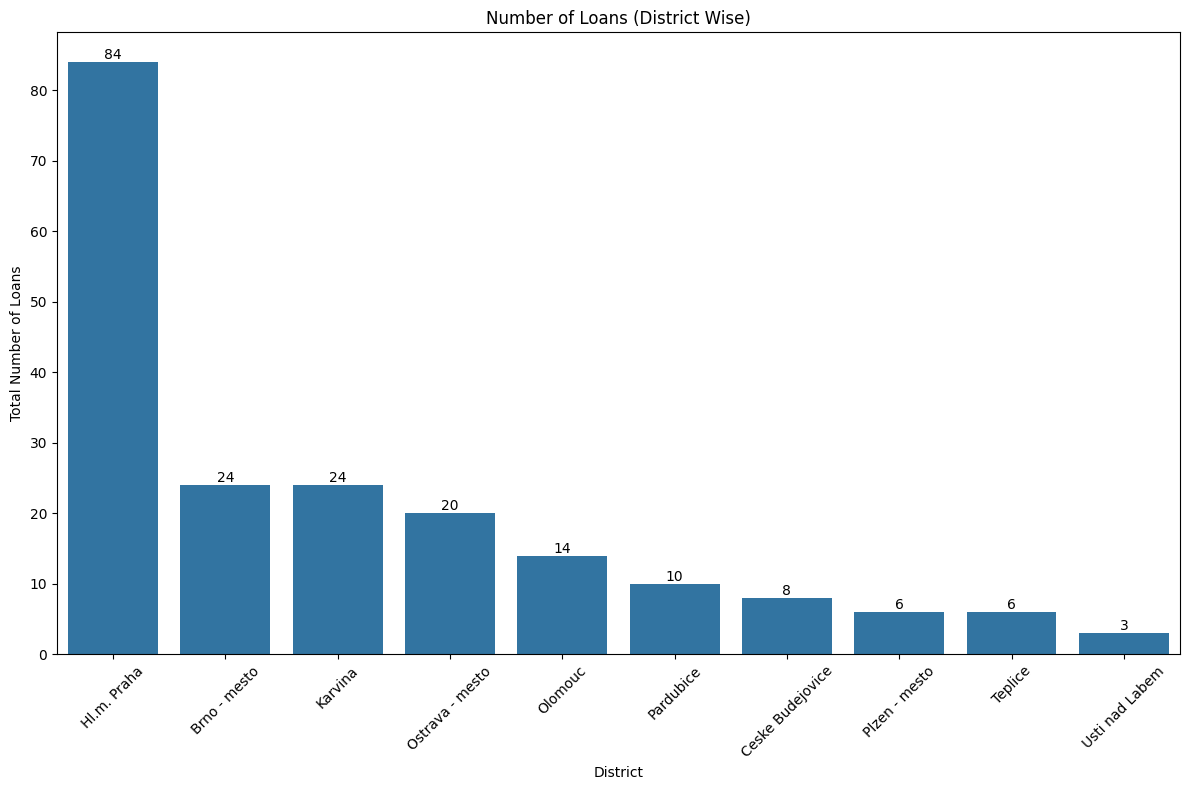

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=loans_per_district, x='A2', y='num_loans')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),  # value (as integer)
                (p.get_x() + p.get_width() / 2, p.get_height()),  # position
                ha='center', va='bottom', fontsize=10, color='black')

plt.title("Number of Loans (District Wise)")
plt.xlabel("District")
plt.ylabel("Total Number of Loans")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
filtered_df6 = AccDistrictTrans_Merged.copy()
filtered_df6['A12'] = filtered_df6['A12'].astype(str)
filtered_df6 = filtered_df6[~filtered_df6['A12'].str.contains(r'\?', na=False)]
filtered_df6.loc[:, 'A12'] = filtered_df6['A12'].astype(float)
filtered_df6['A12'].astype(float)
filtered_df6.shape

(1038237, 28)

In [ ]:
filtered_df6 = filtered_df6[
    (filtered_df6['A12'] > 2) |
    (filtered_df6['A13'] > 2)
]
filtered_df.head()

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,...,region,trans_id,date,type,operation,amount,balance,k_symbol,mm_yy,month
0,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,2,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,01/93,1993-01
1,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,50,1993-01-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,7107.0,OLD AGE PENSION,01/93,1993-01
2,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,154,1993-01-31,CREDIT,NaN,20.1,7127.1,INTEREST CREDITED,01/93,1993-01
3,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,309,1993-02-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,13334.1,OLD AGE PENSION,02/93,1993-02
4,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,509,1993-02-28,CREDIT,NaN,29.6,13363.7,INTEREST CREDITED,02/93,1993-02


In [ ]:
filtered_df6 = filtered_df6[(filtered_df6['operation'].str.contains('COLLECTION FROM ANOTHER BANK',na=False)) ]
filtered_df6.head()

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,...,region,trans_id,date,type,operation,amount,balance,k_symbol,mm_yy,month
1,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,50,1993-01-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,7107.0,OLD AGE PENSION,01/93,1993-01
3,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,309,1993-02-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,13334.1,OLD AGE PENSION,02/93,1993-02
5,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,776,1993-03-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,19570.7,OLD AGE PENSION,03/93,1993-03
7,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,1518,1993-04-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,25807.3,OLD AGE PENSION,04/93,1993-04
10,576,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,Moravia,2543,1993-05-11,CREDIT,COLLECTION FROM ANOTHER BANK,6207.0,29243.9,OLD AGE PENSION,05/93,1993-05


In [ ]:
print(filtered_df6.shape)

(48068, 28)


In [ ]:
total_amount = filtered_df6['amount'].sum()
print(f"💰 Total amount collected from other banks (unemployment > 2% districts): {total_amount}")

💰 Total amount collected from other banks (unemployment > 2% districts): 563410722.0


# **TASK 7**

In [ ]:
DistrictClient_Merged = pd.merge(df3,df5,on='district_id',how='inner')
DistrictClient_Merged.head()

,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A14,A15,A16,region,Unnamed: 0,client_id,birth_number,gender,age,age_levels
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,167,85677,99107,Prague,2,2,450204,MALE,54,MIDDLE AGED
1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,167,85677,99107,Prague,3,3,401009,FEMALE,59,MIDDLE AGED
2,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,167,85677,99107,Prague,22,22,691011,FEMALE,30,ADULT
3,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,167,85677,99107,Prague,23,23,730529,MALE,26,ADULT
4,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,167,85677,99107,Prague,28,28,450929,MALE,54,MIDDLE AGED


In [ ]:
DistrictClient_Merged.shape

(5369, 23)

In [ ]:
DistrictClientDisp_Merged = pd.merge(DistrictClient_Merged,df6,on='client_id',how='inner')
DistrictClientDisp_Merged.head()

,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,region,Unnamed: 0,client_id,birth_number,gender,age,age_levels,disp_id,account_id,type
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,Prague,2,2,450204,MALE,54,MIDDLE AGED,2,2,OWNER
1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,Prague,3,3,401009,FEMALE,59,MIDDLE AGED,3,2,USER
2,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,Prague,22,22,691011,FEMALE,30,ADULT,22,17,OWNER
3,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,Prague,23,23,730529,MALE,26,ADULT,23,17,USER
4,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,Prague,28,28,450929,MALE,54,MIDDLE AGED,28,22,OWNER


In [ ]:
DistrictClientDisp_Merged.shape

(5369, 26)

In [ ]:
DistrictClientDispOrder_Merged = pd.merge(DistrictClientDisp_Merged,df8,on='account_id',how='inner')
DistrictClientDispOrder_Merged.head()

,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,age,age_levels,disp_id,account_id,type,order_id,bank_to,account_to,amount,k_symbol
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,54,MIDDLE AGED,2,2,OWNER,29402,ST,89597016,3372.7,UVER
1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,54,MIDDLE AGED,2,2,OWNER,29403,QR,13943797,7266.0,SIPO
2,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,59,MIDDLE AGED,3,2,USER,29402,ST,89597016,3372.7,UVER
3,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,59,MIDDLE AGED,3,2,USER,29403,QR,13943797,7266.0,SIPO
4,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,30,ADULT,22,17,OWNER,29422,EF,15076423,4032.0,SIPO


In [ ]:
DistrictClientDispOrder_Merged.shape

(7868, 31)

In [ ]:
filtered_df7 = DistrictClientDispOrder_Merged.copy()
#household payment
# filtered_df7a = filtered_df7[filtered_df7['k_symbol'] == 'SIPO']
# filtered_df7a.head()
grouped = filtered_df7.groupby(['A2', 'k_symbol'])['amount'].sum().reset_index()
grouped.head(12)

,A2,k_symbol,amount
0,Benesov,LEASING,9484.1
1,Benesov,POJISTNE,2300.0
2,Benesov,SIPO,141233.0
3,Benesov,UVER,36681.5
4,Beroun,LEASING,14517.1
5,Beroun,POJISTNE,2423.0
6,Beroun,SIPO,170241.0
7,Beroun,UVER,38946.7
8,Blansko,LEASING,6269.7
9,Blansko,POJISTNE,3308.0


In [ ]:
grouped.shape

(302, 3)

In [ ]:
# For each category, find the district with max total amount paid
max_districts = grouped.loc[grouped.groupby('k_symbol')['amount'].idxmax()]

In [ ]:
# Get districts where max money is paid per category
top_districts = max_districts['A2'].unique()

# Filter merged_df for customers in these top districts
top_customers = filtered_df7[filtered_df7['A2'].isin(top_districts)]

In [ ]:
print(max_districts)

             A2  k_symbol     amount
67  Hl.m. Praha   LEASING   147192.9
68  Hl.m. Praha  POJISTNE   157032.0
69  Hl.m. Praha      SIPO  2169099.0
70  Hl.m. Praha      UVER   487537.5


In [ ]:
top_customers.head()

,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,age,age_levels,disp_id,account_id,type,order_id,bank_to,account_to,amount,k_symbol
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,54,MIDDLE AGED,2,2,OWNER,29402,ST,89597016,3372.7,UVER
1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,54,MIDDLE AGED,2,2,OWNER,29403,QR,13943797,7266.0,SIPO
2,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,59,MIDDLE AGED,3,2,USER,29402,ST,89597016,3372.7,UVER
3,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,59,MIDDLE AGED,3,2,USER,29403,QR,13943797,7266.0,SIPO
4,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,30,ADULT,22,17,OWNER,29422,EF,15076423,4032.0,SIPO


In [ ]:
DistrictClientDispLoan_Merged = pd.merge(DistrictClientDisp_Merged,df4,on='account_id',how='inner')
DistrictClientDispLoan_Merged.head()

,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,age_levels,disp_id,account_id,type,loan_id,date,amount,duration,payments,status
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,MIDDLE AGED,2,2,OWNER,4959,940105,80952,24,3373,A
1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,MIDDLE AGED,3,2,USER,4959,940105,80952,24,3373,A
2,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,MIDDLE AGED,424,347,OWNER,5045,950501,187224,24,7801,B
3,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,MIDDLE AGED,861,718,OWNER,5117,970820,76944,12,6412,A
4,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,MIDDLE AGED,1029,854,OWNER,5138,950530,87216,48,1817,C


In [ ]:
filtered_df8 = DistrictClientDispLoan_Merged.copy()

In [ ]:
profile = filtered_df8.groupby(['A2', 'status']).agg(
    num_customers=('account_id', 'nunique'),  # or 'client_id'
    total_amount=('amount', 'sum'),           # if you have 'amount' column
    avg_amount=('amount', 'mean')             # optional
).reset_index()

In [ ]:
print(profile.head())

        A2 status  num_customers  total_amount  avg_amount
0  Benesov      A              1        107640    107640.0
1  Benesov      C              6       1537320    192165.0
2   Beroun      A              2        103680     34560.0
3   Beroun      C              3        913872    304624.0
4   Beroun      D              2        527676    263838.0


In [ ]:
pivot = profile.pivot(index='A2', columns='status', values='num_customers').fillna(0)
print(pivot)

status              A    B     C    D
A2                                   
Benesov           1.0  0.0   6.0  0.0
Beroun            2.0  0.0   3.0  2.0
Blansko           3.0  0.0   3.0  1.0
Breclav           1.0  1.0   4.0  0.0
Brno - mesto      3.0  2.0  15.0  3.0
...               ...  ...   ...  ...
Vsetin            1.0  1.0   5.0  0.0
Vyskov            4.0  0.0   4.0  0.0
Zdar nad Sazavou  4.0  0.0   3.0  0.0
Zlin              5.0  0.0  10.0  1.0
Znojmo            1.0  0.0   4.0  1.0

[77 rows x 4 columns]


In [ ]:
loan_status_summary = profile.pivot(index='A2', columns='status', values='num_customers').fillna(0)
loan_status_summary.columns = ['status_A', 'status_B', 'status_C', 'status_D']
loan_status_summary.reset_index(inplace=True)

In [ ]:
# Merge the dataframes on column A2
merged_analysis = pd.merge(loan_status_summary, df3, on='A2', how='inner')

# Clean and convert 'A15' and 'A16' to float (after removing '?')
for col in ['A15', 'A16']:
    merged_analysis[col] = pd.to_numeric(
        merged_analysis[col].astype(str).str.replace('?', '', regex=False).str.strip(),
        errors='coerce'
    )

# Drop rows where either A15 or A16 couldn't be converted (i.e., became NaN)
merged_analysis = merged_analysis.dropna(subset=['A15', 'A16'])

In [ ]:
merged_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A2           76 non-null     object 
 1   status_A     76 non-null     float64
 2   status_B     76 non-null     float64
 3   status_C     76 non-null     float64
 4   status_D     76 non-null     float64
 5   district_id  76 non-null     int64  
 6   A3           76 non-null     object 
 7   A4           76 non-null     int64  
 8   A5           76 non-null     int64  
 9   A6           76 non-null     int64  
 10  A7           76 non-null     int64  
 11  A8           76 non-null     int64  
 12  A9           76 non-null     int64  
 13  A10          76 non-null     float64
 14  A11          76 non-null     int64  
 15  A12          76 non-null     object 
 16  A13          76 non-null     float64
 17  A14          76 non-null     int64  
 18  A15          76 non-null     float64
 19  A16          76

In [ ]:
merged_analysis.head()

,A2,status_A,status_B,status_C,status_D,district_id,A3,A4,A5,A6,...,A8,A9,A10,A11,A12,A13,A14,A15,A16,region
0,Benesov,1.0,0.0,6.0,0.0,2,central Bohemia,88884,80,26,...,2,5,46.7,8507,1.67,1.85,132,2159.0,2674,Bohemia
1,Beroun,2.0,0.0,3.0,2.0,3,central Bohemia,75232,55,26,...,1,5,41.7,8980,1.95,2.21,111,2824.0,2813,Bohemia
2,Blansko,3.0,0.0,3.0,1.0,53,south Moravia,107911,88,33,...,2,7,50.9,8240,2.53,3.56,99,1850.0,1903,Moravia
3,Breclav,1.0,1.0,4.0,0.0,56,south Moravia,124605,11,42,...,1,8,46.0,8772,4.69,4.98,126,2854.0,3158,Moravia
4,Brno - mesto,3.0,2.0,15.0,3.0,54,south Moravia,387570,0,0,...,1,1,100.0,9897,1.6,1.96,140,18721.0,18696,Moravia


In [ ]:
merged_analysis['avg_crime'] = (merged_analysis['A15'] + merged_analysis['A16']) / 2

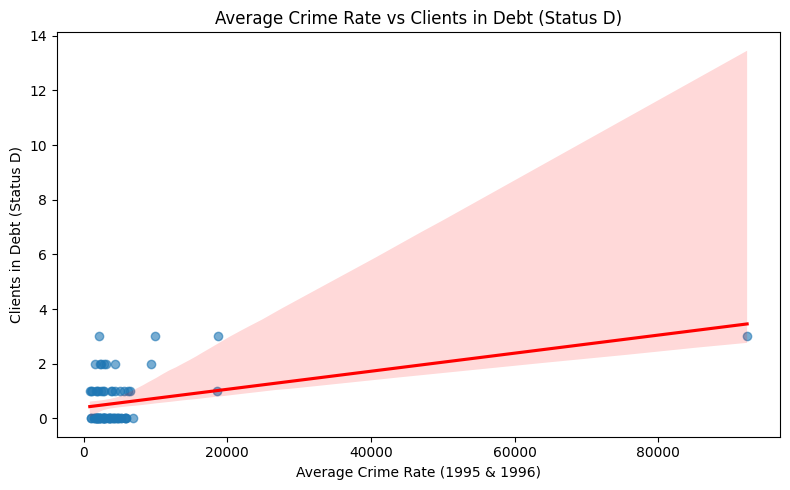

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data = merged_analysis,
    x='avg_crime',
    y='status_D',
    scatter_kws={'alpha': 0.6},      # fade the dots a little
    line_kws={'color': 'red'},       # red trend line
)
plt.title("Average Crime Rate vs Clients in Debt (Status D)")
plt.xlabel("Average Crime Rate (1995 & 1996)")
plt.ylabel("Clients in Debt (Status D)")
plt.tight_layout()
plt.show()

In [ ]:
merged_analysis = merged_analysis[
    ~merged_analysis['A12'].astype(str).str.contains(r'\?', na=False) &
    ~merged_analysis['A13'].astype(str).str.contains(r'\?', na=False)
]
merged_analysis['A12'] = merged_analysis['A12'].astype(float)
merged_analysis['A13'] = merged_analysis['A13'].astype(float)

In [ ]:
merged_analysis['avg_unemployment_rate'] = (merged_analysis['A12'] + merged_analysis['A13']) / 2

In [ ]:
merged_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76 entries, 0 to 76
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   A2                     76 non-null     object 
 1   status_A               76 non-null     float64
 2   status_B               76 non-null     float64
 3   status_C               76 non-null     float64
 4   status_D               76 non-null     float64
 5   district_id            76 non-null     int64  
 6   A3                     76 non-null     object 
 7   A4                     76 non-null     int64  
 8   A5                     76 non-null     int64  
 9   A6                     76 non-null     int64  
 10  A7                     76 non-null     int64  
 11  A8                     76 non-null     int64  
 12  A9                     76 non-null     int64  
 13  A10                    76 non-null     float64
 14  A11                    76 non-null     int64  
 15  A12          

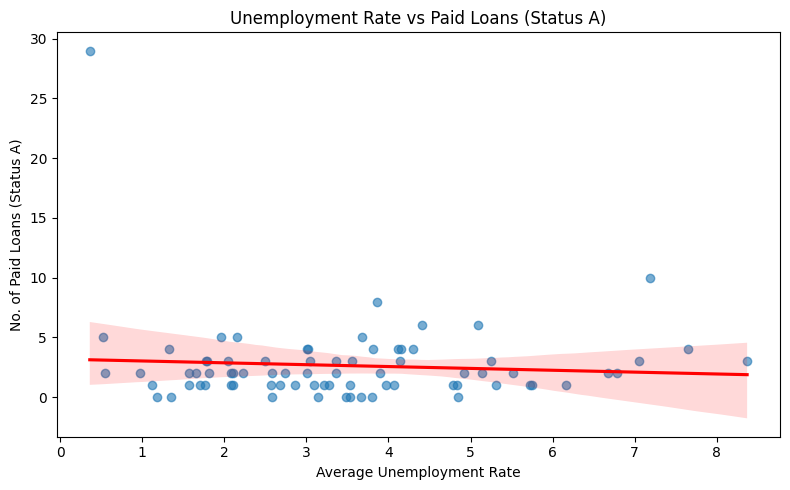

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=merged_analysis,
    x='avg_unemployment_rate',
    y='status_A',
    scatter_kws={'alpha': 0.6},   # scatter transparency
    line_kws={'color': 'red'},    # trend line color
)
plt.title("Unemployment Rate vs Paid Loans (Status A)")
plt.xlabel("Average Unemployment Rate")
plt.ylabel("No. of Paid Loans (Status A)")
plt.tight_layout()
plt.show()

In [ ]:
avg_salary_by_region = merged_analysis.groupby('A3')['A11'].mean().reset_index()

/tmp/ipython-input-93-840933028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_by_region, x='A3', y='A11', palette='viridis')


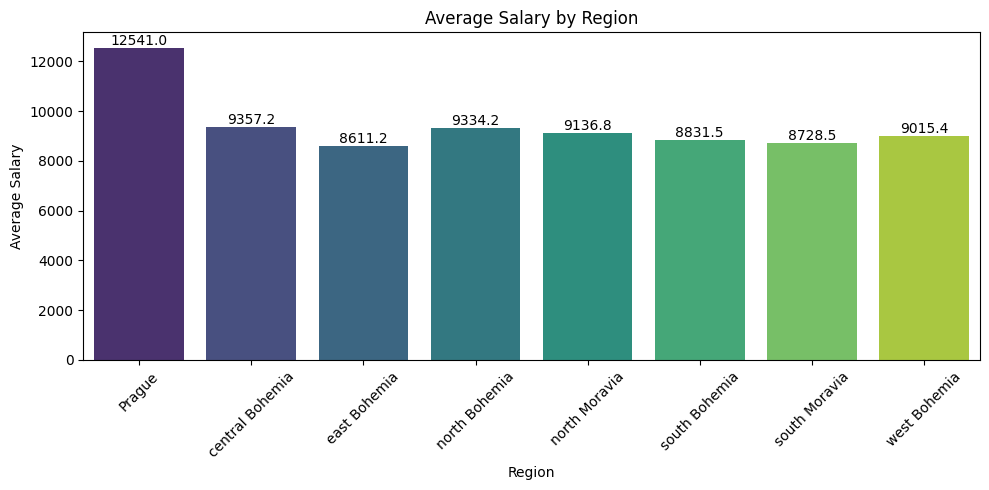

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_salary_by_region, x='A3', y='A11', palette='viridis')
for index, row in avg_salary_by_region.iterrows():
    plt.text(index, row['A11'], round(row['A11'], 1), ha='center', va='bottom')

plt.title("Average Salary by Region")
plt.xlabel("Region")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)  # rotate x labels if many regions
plt.tight_layout()
plt.show()

In [ ]:
AccDistrictLoansOrder_Merged = pd.merge(AccDistrictLoans_Merged,df8,on='account_id',how='inner')
AccDistrictLoansOrder_Merged.head()

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,...,date,amount_x,duration,payments,status,order_id,bank_to,account_to,amount_y,k_symbol
0,5270,44,MONTHLY ISSUANCE,Chrudim,east Bohemia,105606,77,26,7,2,...,931122,79608,24,3317,A,37180,CD,13973260,3317.0,UVER
1,11265,15,MONTHLY ISSUANCE,Cesky Krumlov,south Bohemia,58796,22,16,7,1,...,930915,52788,12,4399,A,46184,KL,37816989,506.0,SIPO
2,11265,15,MONTHLY ISSUANCE,Cesky Krumlov,south Bohemia,58796,22,16,7,1,...,930915,52788,12,4399,A,46185,WX,80508869,2607.0,NaN
3,11265,15,MONTHLY ISSUANCE,Cesky Krumlov,south Bohemia,58796,22,16,7,1,...,930915,52788,12,4399,A,46186,KL,33709621,4399.0,UVER
4,10364,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,931110,21924,36,609,A,44769,EF,67477196,6262.0,SIPO


In [ ]:
AccDistrictLoansOrder_Merged.shape

(1513, 30)

In [ ]:
AccDistrictLoansOrderDisp_Merged = pd.merge(AccDistrictLoansOrder_Merged,df6,on='account_id',how='inner')
AccDistrictLoansOrderDisp_Merged.head()

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,...,payments,status,order_id,bank_to,account_to,amount_y,k_symbol,disp_id,client_id,type
0,5270,44,MONTHLY ISSUANCE,Chrudim,east Bohemia,105606,77,26,7,2,...,3317,A,37180,CD,13973260,3317.0,UVER,6367,6367,OWNER
1,11265,15,MONTHLY ISSUANCE,Cesky Krumlov,south Bohemia,58796,22,16,7,1,...,4399,A,46184,KL,37816989,506.0,SIPO,13537,13845,OWNER
2,11265,15,MONTHLY ISSUANCE,Cesky Krumlov,south Bohemia,58796,22,16,7,1,...,4399,A,46185,WX,80508869,2607.0,NaN,13537,13845,OWNER
3,11265,15,MONTHLY ISSUANCE,Cesky Krumlov,south Bohemia,58796,22,16,7,1,...,4399,A,46186,KL,33709621,4399.0,UVER,13537,13845,OWNER
4,10364,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,609,A,44769,EF,67477196,6262.0,SIPO,12446,12754,OWNER


In [ ]:
AccDistrictLoansOrderDisp_Merged.shape

(1841, 33)

In [ ]:
filtered_df9 = AccDistrictLoansOrderDisp_Merged.copy()

In [ ]:
filtered_df9 = filtered_df9[(filtered_df9['type'] == 'OWNER') & (filtered_df9['k_symbol'].notna())]
filtered_df9.head(10)

,account_id,district_id,frequency,A2,A3,A4,A5,A6,A7,A8,...,payments,status,order_id,bank_to,account_to,amount_y,k_symbol,disp_id,client_id,type
0,5270,44,MONTHLY ISSUANCE,Chrudim,east Bohemia,105606,77,26,7,2,...,3317,A,37180,CD,13973260,3317.0,UVER,6367,6367,OWNER
1,11265,15,MONTHLY ISSUANCE,Cesky Krumlov,south Bohemia,58796,22,16,7,1,...,4399,A,46184,KL,37816989,506.0,SIPO,13537,13845,OWNER
3,11265,15,MONTHLY ISSUANCE,Cesky Krumlov,south Bohemia,58796,22,16,7,1,...,4399,A,46186,KL,33709621,4399.0,UVER,13537,13845,OWNER
4,10364,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,609,A,44769,EF,67477196,6262.0,SIPO,12446,12754,OWNER
6,10364,55,MONTHLY ISSUANCE,Brno - venkov,south Moravia,157042,49,70,18,0,...,609,A,44770,IJ,11477667,609.0,UVER,12446,12754,OWNER
8,3834,54,MONTHLY ISSUANCE,Brno - mesto,south Moravia,387570,0,0,0,1,...,1921,A,35049,KL,49577087,3114.0,SIPO,4620,4620,OWNER
12,3834,54,MONTHLY ISSUANCE,Brno - mesto,south Moravia,387570,0,0,0,1,...,1921,A,35051,MN,51878350,3189.0,POJISTNE,4620,4620,OWNER
16,3834,54,MONTHLY ISSUANCE,Brno - mesto,south Moravia,387570,0,0,0,1,...,1921,A,35053,WX,34075695,1921.0,UVER,4620,4620,OWNER
18,9307,68,MONTHLY ISSUANCE,Frydek - Mistek,north Moravia,228848,15,40,18,2,...,3492,A,43182,EF,53406888,3491.5,UVER,11153,11461,OWNER
19,9307,68,MONTHLY ISSUANCE,Frydek - Mistek,north Moravia,228848,15,40,18,2,...,3492,A,43183,EF,84733318,4654.0,SIPO,11153,11461,OWNER


In [ ]:
filtered_df9.shape

(1237, 33)

In [ ]:
result = filtered_df9['A2'].value_counts().reset_index()
result.columns = ['A2', 'num_owners_with_perm_orders_and_loans']
result.head()

,A2,num_owners_with_perm_orders_and_loans
0,Hl.m. Praha,159
1,Karvina,42
2,Brno - mesto,39
3,Frydek - Mistek,35
4,Ostrava - mesto,35


In [ ]:
Card_Disposition_Merged.shape

(892, 7)

In [ ]:
Card_Disposition_Loan_Merged = pd.merge(Card_Disposition_Merged,df4,on='account_id',how='inner')
Card_Disposition_Loan_Merged.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y,loan_id,date,amount,duration,payments,status
0,1005,9285,CLASSIC,931107,9593,7753,OWNER,6577,940311,51696,24,2154,A
1,577,3687,CLASSIC,940215,3687,3050,OWNER,5595,940902,82896,12,6908,A
2,1038,9787,JUNIOR,950330,10095,8173,OWNER,6678,940520,80340,12,6695,A
3,418,2623,CLASSIC,950414,2623,2167,OWNER,5390,941030,170256,24,7094,A
4,159,946,CLASSIC,950501,946,790,OWNER,5126,940724,208128,48,4336,B


In [ ]:
Card_Disposition_Loan_Merged.shape

(170, 13)

In [ ]:
num_clients_with_both = Card_Disposition_Loan_Merged['client_id'].nunique()
print("Customers with both credit card and loan:", num_clients_with_both)

Customers with both credit card and loan: 170


In [ ]:
filtered_df10 = Card_Disposition_Loan_Merged.copy()
filtered_df_10 = filtered_df10[(filtered_df10['status'] == 'B') | (filtered_df10['status'] == 'D')]
print(filtered_df_10.shape)

(5, 13)


In [ ]:
filtered_df_10.head()

,card_id,disp_id,type_x,issued,client_id,account_id,type_y,loan_id,date,amount,duration,payments,status
4,159,946,CLASSIC,950501,946,790,OWNER,5126,940724,208128,48,4336,B
17,600,3829,CLASSIC,960520,3829,3166,OWNER,5624,950103,177744,48,3703,D
91,844,6567,JUNIOR,980304,6567,5442,OWNER,6112,940617,174744,24,7281,B
119,833,6299,CLASSIC,980801,6299,5213,OWNER,6063,960425,320976,48,6687,D
134,389,2489,GOLD,980919,2489,2051,OWNER,5363,970422,293880,60,4898,D


In [ ]:
filtered_df_10a = filtered_df_10.copy()
fil =filtered_df_10a.groupby('type_x')['amount'].sum().reset_index()

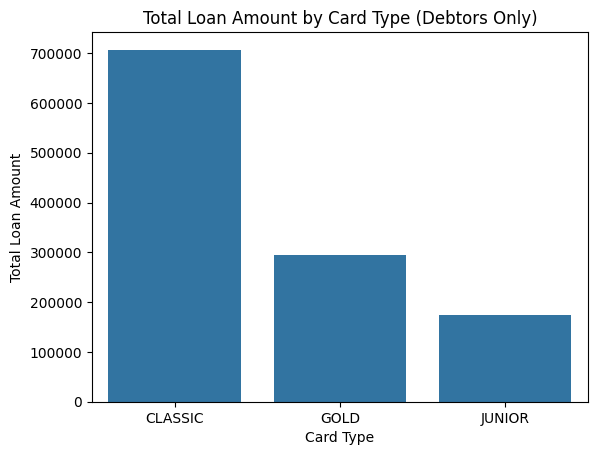

In [ ]:
sns.barplot(data = fil.reset_index(), x='type_x', y='amount')
plt.title("Total Loan Amount by Card Type (Debtors Only)")
plt.ylabel("Total Loan Amount")
plt.xlabel("Card Type")
plt.show()

In [ ]:
DistrictClientDisp_Merged.shape

(5369, 26)

In [ ]:
DistrictClientDispCard_Merged = pd.merge(DistrictClientDisp_Merged,df2,on='disp_id',how='inner')
DistrictClientDispCard_Merged.head()

,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,birth_number,gender,age,age_levels,disp_id,account_id,type_x,card_id,type_y,issued
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,560218,FEMALE,43,MIDDLE AGED,77,66,OWNER,10,CLASSIC,961207
1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,781225,FEMALE,21,YOUTH,83,71,OWNER,12,JUNIOR,960911
2,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,350125,MALE,64,MIDDLE AGED,112,95,OWNER,14,CLASSIC,960217
3,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,660730,MALE,33,ADULT,339,281,OWNER,56,CLASSIC,981122
4,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,300109,MALE,69,SENIOR,365,300,OWNER,59,CLASSIC,971027


In [ ]:
DistrictClientDispCard_Merged.shape

(892, 29)

In [ ]:
filtered_df11a = DistrictClientDispCard_Merged.copy()
#filtered_df11a['region_clean'] = filtered_df11a['region'].astype(str).str.strip().str.lower()

In [ ]:
print(filtered_df11a['region'].dropna().unique().tolist())

['Prague', 'Bohemia', 'Moravia']


In [ ]:
filtered_df11a = filtered_df11a[filtered_df11a['gender']=='MALE']

In [ ]:
filtered_df11a = filtered_df11a[filtered_df11a['type_y']=='GOLD']

In [ ]:
filtered_df11a = filtered_df11a[filtered_df11a['region'].isin(['Bohemia', 'Moravia'])]

In [ ]:
filtered_df11a.head(49)

,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,birth_number,gender,age,age_levels,disp_id,account_id,type_x,card_id,type_y,issued
148,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,...,570929,MALE,42,MIDDLE AGED,7127,5891,OWNER,874,GOLD,971007
166,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,...,570421,MALE,42,MIDDLE AGED,3378,2796,OWNER,531,GOLD,980824
186,7,Melnik,central Bohemia,94725,38,28,1,3,6,63.4,...,570704,MALE,42,MIDDLE AGED,2715,2242,OWNER,431,GOLD,970912
201,8,Mlada Boleslav,central Bohemia,112065,95,19,7,1,8,69.4,...,360101,MALE,63,MIDDLE AGED,3944,3260,OWNER,617,GOLD,970409
207,9,Nymburk,central Bohemia,81344,61,23,4,2,6,55.3,...,430913,MALE,56,MIDDLE AGED,1842,1519,OWNER,292,GOLD,970118
220,10,Praha - vychod,central Bohemia,92084,55,29,4,3,5,46.7,...,510218,MALE,48,MIDDLE AGED,1707,1408,OWNER,268,GOLD,971211
238,12,Pribram,central Bohemia,107870,84,29,6,1,6,58.0,...,460401,MALE,53,MIDDLE AGED,7683,6363,OWNER,906,GOLD,980518
270,15,Cesky Krumlov,south Bohemia,58796,22,16,7,1,5,51.9,...,630109,MALE,36,MIDDLE AGED,10604,8856,OWNER,1076,GOLD,980727
294,18,Pisek,south Bohemia,70699,60,13,2,1,4,65.3,...,400121,MALE,59,MIDDLE AGED,3292,2726,OWNER,518,GOLD,980210
308,19,Prachatice,south Bohemia,51428,50,11,3,1,4,52.7,...,380803,MALE,61,MIDDLE AGED,3601,2982,OWNER,565,GOLD,970106


In [ ]:
filtered_df11a.shape

(46, 29)

In [ ]:
fil1 = filtered_df11a.groupby('region').size().reset_index(name='count')
fil1.head()

,region,count
0,Bohemia,28
1,Moravia,18


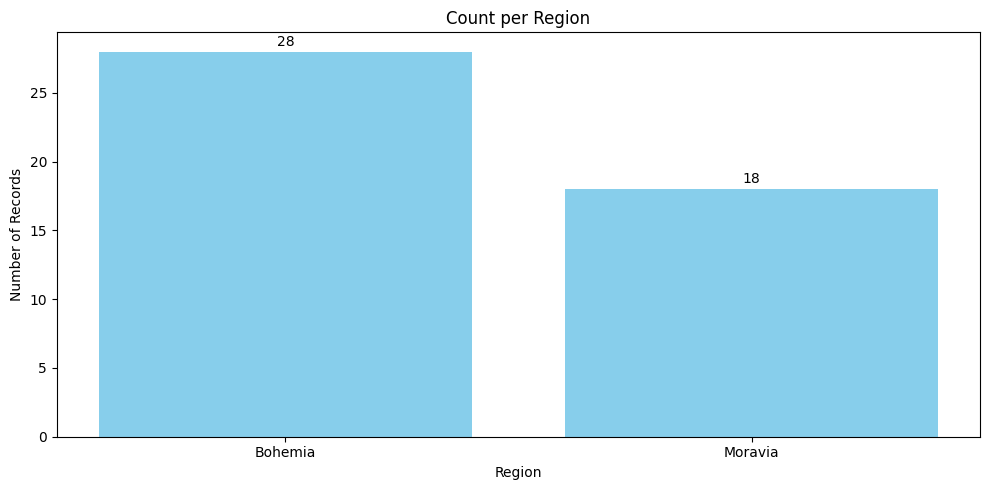

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(fil1['region'], fil1['count'], color='orange')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.20, int(yval), ha='center', va='bottom')

plt.xlabel('Region')
plt.ylabel('Number of Records')
plt.title('Count per Region')
plt.tight_layout()
plt.show()

# **ML**

In [ ]:
DispClient_Merged = pd.merge(df6,df5,on='client_id',how='inner')
DispClient_Merged.head()

,disp_id,client_id,account_id,type,Unnamed: 0,birth_number,district_id,gender,age,age_levels
0,1,1,1,OWNER,1,701213,18,FEMALE,29,ADULT
1,2,2,2,OWNER,2,450204,1,MALE,54,MIDDLE AGED
2,3,3,2,USER,3,401009,1,FEMALE,59,MIDDLE AGED
3,4,4,3,OWNER,4,561201,5,MALE,43,MIDDLE AGED
4,5,5,3,USER,5,600703,5,FEMALE,39,MIDDLE AGED


In [ ]:
DispClient_Merged.shape

(5369, 10)

In [ ]:
DispClientLoan_Merged = pd.merge(DispClient_Merged,df4,on='account_id',how='inner')
DispClientLoan_Merged.head()

,disp_id,client_id,account_id,type,Unnamed: 0,birth_number,district_id,gender,age,age_levels,loan_id,date,amount,duration,payments,status
0,2,2,2,OWNER,2,450204,1,MALE,54,MIDDLE AGED,4959,940105,80952,24,3373,A
1,3,3,2,USER,3,401009,1,FEMALE,59,MIDDLE AGED,4959,940105,80952,24,3373,A
2,25,25,19,OWNER,25,390423,21,FEMALE,60,MIDDLE AGED,4961,960429,30276,12,2523,B
3,31,31,25,OWNER,31,620209,68,MALE,37,MIDDLE AGED,4962,971208,30276,12,2523,A
4,45,45,37,OWNER,43,520826,20,MALE,47,MIDDLE AGED,4967,981014,318480,60,5308,D


In [ ]:
DispClientLoan_Merged.shape

(827, 16)

In [ ]:
filtered_df12 = DispClientLoan_Merged.copy()
filtered_df12 = filtered_df12[filtered_df12['age_levels'].isin(['MIDDLE AGED', 'ADULT'])]
filtered_df12.head()

,disp_id,client_id,account_id,type,Unnamed: 0,birth_number,district_id,gender,age,age_levels,loan_id,date,amount,duration,payments,status
0,2,2,2,OWNER,2,450204,1,MALE,54,MIDDLE AGED,4959,940105,80952,24,3373,A
1,3,3,2,USER,3,401009,1,FEMALE,59,MIDDLE AGED,4959,940105,80952,24,3373,A
2,25,25,19,OWNER,25,390423,21,FEMALE,60,MIDDLE AGED,4961,960429,30276,12,2523,B
3,31,31,25,OWNER,31,620209,68,MALE,37,MIDDLE AGED,4962,971208,30276,12,2523,A
4,45,45,37,OWNER,43,520826,20,MALE,47,MIDDLE AGED,4967,981014,318480,60,5308,D


In [ ]:
filtered_df12.shape

(717, 16)

In [ ]:
summary = filtered_df12.groupby('age_levels')[['amount', 'payments']].mean().reset_index()
print(summary)

    age_levels         amount     payments
0        ADULT  161198.400000  4240.770732
1  MIDDLE AGED  144969.117188  4177.416016


In [ ]:
status_summary = filtered_df12.groupby(['age_levels', 'status']).size().unstack(fill_value=0)
print(status_summary)

status         A   B    C   D
age_levels                   
ADULT         59   4  129  13
MIDDLE AGED  162  22  303  25


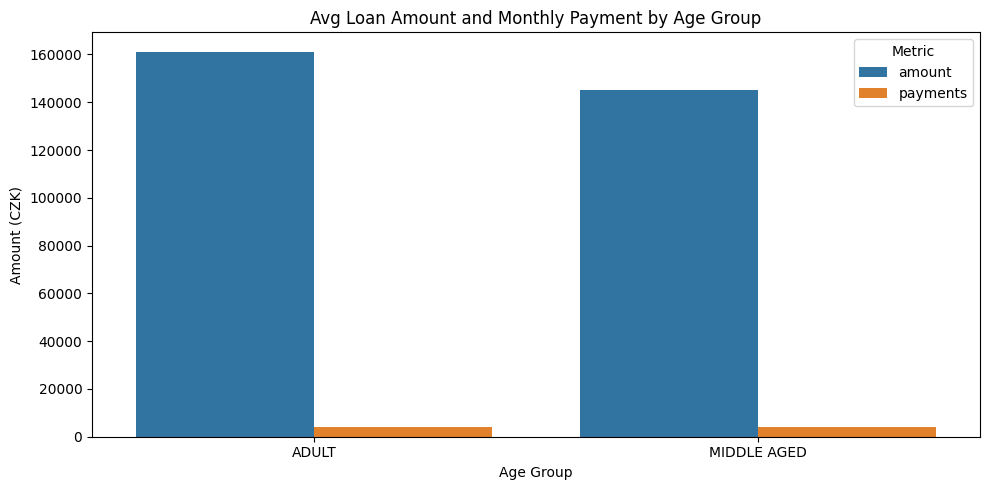

In [ ]:
plt.figure(figsize=(10, 5))
summary_melted = summary.melt(id_vars='age_levels', value_vars=['amount', 'payments'], var_name='Metric', value_name='Value')
sns.barplot(data=summary_melted, x='age_levels', y='Value', hue='Metric')
plt.title("Avg Loan Amount and Monthly Payment by Age Group")
plt.ylabel("Amount (CZK)")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

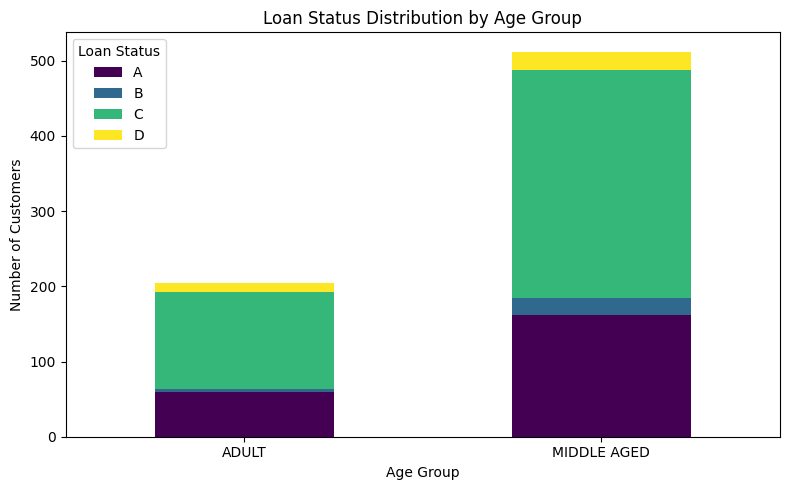

In [ ]:
status_summary.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title("Loan Status Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Loan Status")
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Encode labels
le_age = LabelEncoder()
le_status = LabelEncoder()
filtered_df12['age_levels_encoded'] = le_age.fit_transform(filtered_df12['age_levels'])
filtered_df12['status_encoded'] = le_status.fit_transform(filtered_df12['status'])

# Features and target
X = filtered_df12[['amount', 'payments', 'age_levels_encoded']]
y = filtered_df12['status_encoded']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check new class distribution
from collections import Counter
print("After SMOTE:", Counter(y_resampled))

After SMOTE: Counter({0: 432, 1: 432, 3: 432, 2: 432})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Train a model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=le_status.classes_))

              precision    recall  f1-score   support

           A       0.69      0.77      0.73        88
           B       0.82      0.82      0.82        91
           C       0.64      0.59      0.62        88
           D       0.72      0.68      0.70        79

    accuracy                           0.72       346
   macro avg       0.72      0.72      0.72       346
weighted avg       0.72      0.72      0.72       346



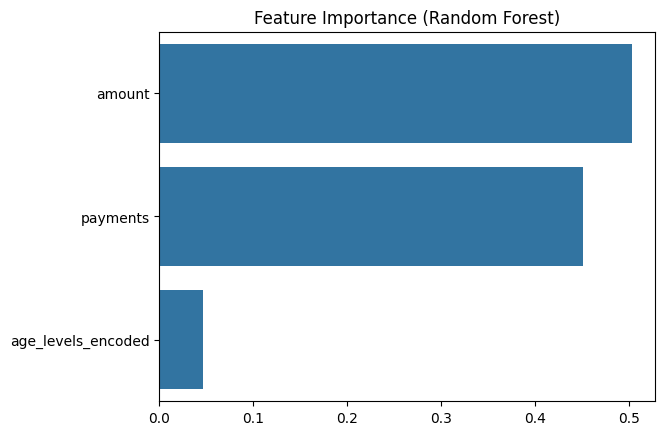

In [ ]:
import seaborn as sns

importances = clf.feature_importances_
features = ['amount', 'payments', 'age_levels_encoded']
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Create the model
rf = RandomForestClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='f1_macro', verbose=2)

# Fit the model
grid_search.fit(X_resampled, y_resampled)

# Best parameters and estimator
best_rf = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# Evaluate
from sklearn.metrics import classification_report
y_pred_rf_tuned = best_rf.predict(X_test)
print("📊 Tuned Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf_tuned))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

✅ Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
📊 Tuned Random Forest Report:

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        88
           1       0.83      0.88      0.86        91
           2       0.88      0.69      0.78        88
           3       0.84      0.85      0.84        79

    accuracy                           0.83       346
   macro avg       0.83      0.83      0.83       346
weighted avg       0.83      0.83      0.83       346



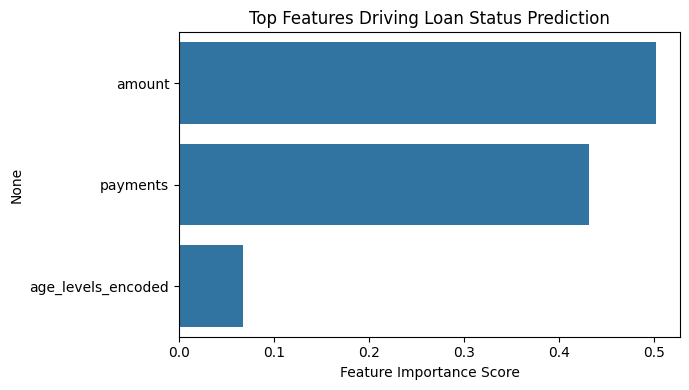

In [ ]:
feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
plt.figure(figsize=(7, 4))
sns.barplot(x=feat_importances.sort_values(ascending=False), y=feat_importances.sort_values(ascending=False).index)
plt.title("Top Features Driving Loan Status Prediction")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()
